In [1]:
#5.4単純なレイヤの実装
#MullLayer:乗算レイヤー（乗算ノード）
#ADDLayer:加算レイヤー（加算ノード）

#層（レイヤー）とは一つのクラスで実装するものを指す
#前章で出てきた、シグモイド関数のsigmoid,行列の積の為にのaffline等、層単位で実装を行う
#層はレイヤーって言葉に統一する

#レイヤーではforward(),backforward()の共通メソッドがある。

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self,dout):
        dx = dout * self.y # x とy をひっくり返す。
        dy = dout * self.x

        return dx, dy

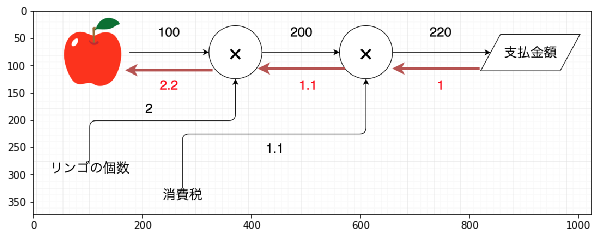

In [2]:
#__init__は初期化。順伝播時の入力値を保持するため
#forword()はx,yの2つの引数を受け取り、それらを乗算して出力する。
#backword()は、上流から戻ってくる微分(dout)に対して、順伝播の"ひっくり返した値"を乗算してから元に戻してくる
#図にするとこれ。

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod001.png')
plt.figure(figsize=(10, 4)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [3]:
#これがMulLayerの実装となる、（Multiplication＝乗算）

apple = 100
apple_num = 2
tax = 1.1

#layer
mul_apple_layer = MulLayer()
mul_tax_Layer = MulLayer()

#forward
apple_price =mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

NameError: name 'mul_tax_layer' is not defined

In [6]:
apple = 100
apple_num = 2
tax = 1.1

#layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#forward
apple_price =mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [5]:
#上記の計算式は順伝播計算

#backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backword(dprice)
dapple, dapple_num = mul_apple_layer.backword(dapple_price)

print(dapple, dapple_num, dtax)

NameError: name 'mul_tax_layer' is not defined

In [7]:
#backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backword(dprice)
dapple, dapple_num = mul_apple_layer.backword(dapple_price)

print(dapple, dapple_num, dtax)

AttributeError: 'MulLayer' object has no attribute 'backword'

In [8]:
#backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [9]:
apple = 100
apple_num = 2
tax = 1.1

#layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#forward
apple_price =mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [10]:
#backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


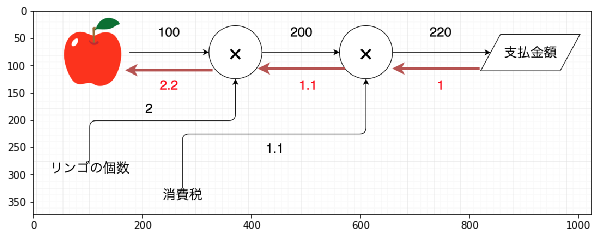

In [11]:
#220.00000000000003
#2.2 110.00000000000001 200

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod001.png')
plt.figure(figsize=(10, 4)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [12]:
#此処で行っているのは、その値に行くまでの道のりを計算していて、
#その答えを出すためにどういう順番で計算していたのか？という事を出している。
#また直列でやっているように見えるけれど、これを複雑にするとPCでも計算能力を要するため、
#その計算負荷を抑えるために誤差逆伝播法を行っている事を念頭に置いておくこと。

In [13]:
#5.4.2　加算レイヤーの実装
class AddLayer:
    def __init__(self):
        pass #加算レイヤーでは初期化はいらない。passは何もしないという命令

    def forward(self,x,y):
        out = x + y
        return out

    def backward(self,dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

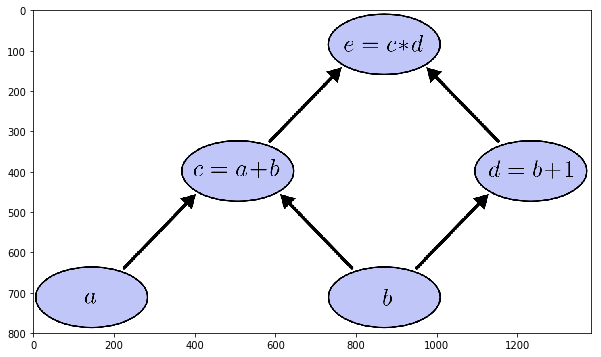

In [14]:
#前回しつこくやったおさらい。
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod007.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

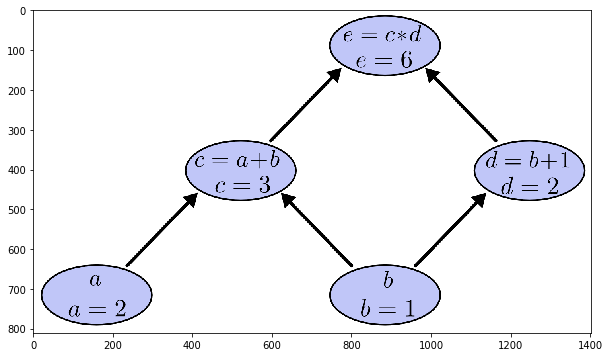

In [15]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod008.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

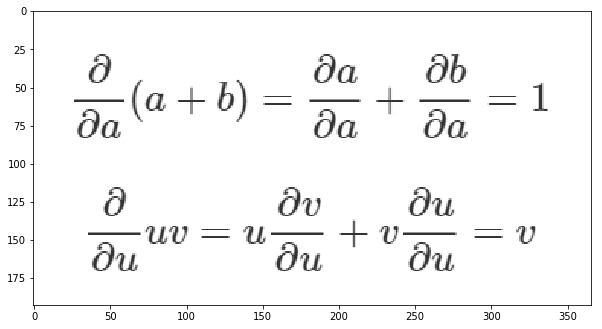

In [16]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod009.jpg')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

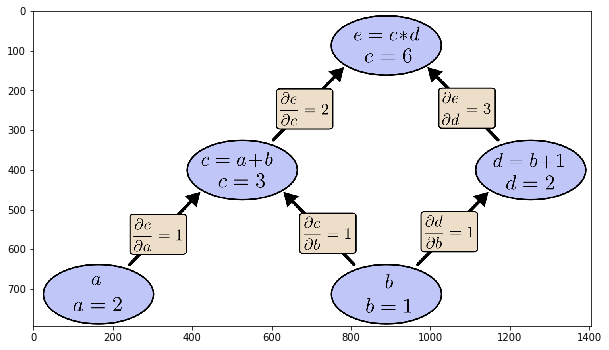

In [17]:
#ラウンドＤって記号（∂）が出てくるけれど、∂を見ると一周して戻ってくるって感じがあるし、ラウンドＤってのも回ってくるって意味だし。
#要は記号は本来それを簡易的に表そうとした昔の人の知恵であり、惑わされるというよりか何故この記号なのか？形なのか？を考えたほうが良い。
#因みにボクの辿り着いた∂は戻ってくるっていう意味を備えた文字で、変数に添えるだけと考えている。

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod009.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

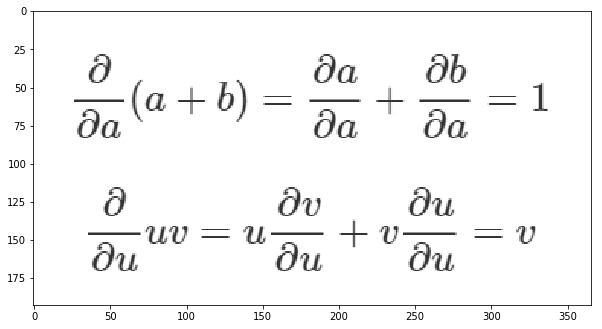

In [18]:
#a=2, b=1, c=3, d=2, e=6
#c= a+b →2+1 =3
#d= b+1 →1+1 =2
#e= c*d →2*3 =6

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod009.jpg')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

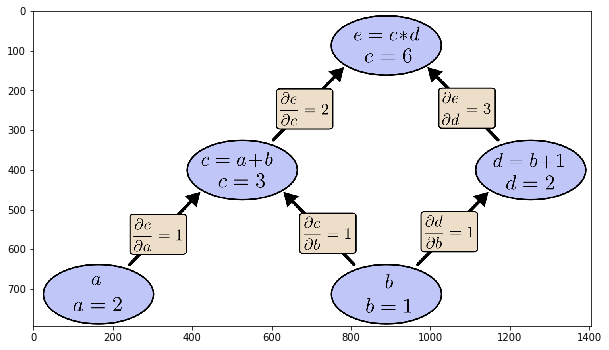

In [19]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod009.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

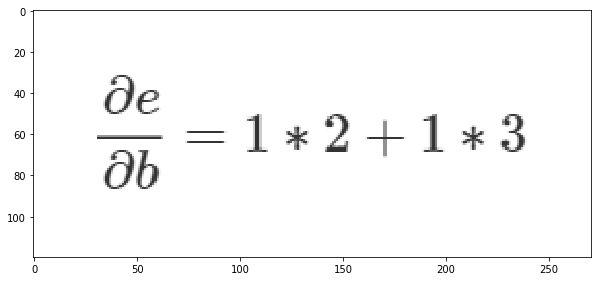

In [20]:
#上記で例えば直接つながってない同士の関係性を求める方法はどうしたらいいのだろうという疑問
#…ってのを考える人がこの世にはいる訳だ…。
#合理的に行けばもっと計算早められんじゃね？って所だろうな。

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod010.jpg')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

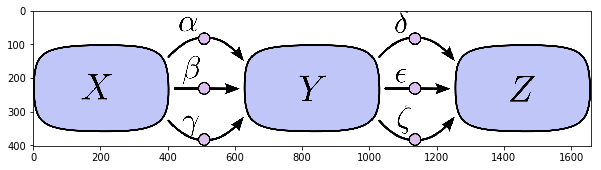

In [21]:
#っていっても全て順番に計算していって答えを出している訳だから、1*2 or 1*3を
#すっ飛ばすわけにはいかないけれど、仮にわかっているならこれ程素早く回答を得られることはない。

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod010.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

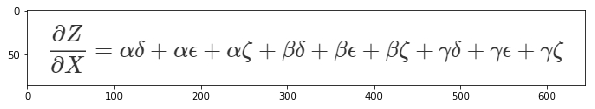

In [22]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod011.jpg')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

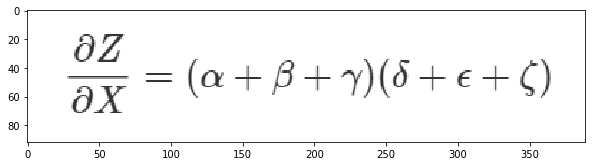

In [23]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod012.jpg')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

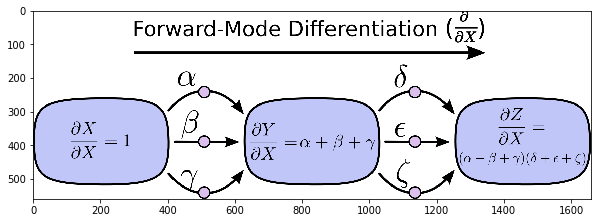

In [24]:
#道筋を因数分解する
#21番目の道筋の和は9通りある事になる。
#そしてこれを計算グラフにすると22番目となり、勿論それで終えれるならばPCに頼らなくても良い。
#つまり23番のように因数分解して計算したほうがよりショートカット出来る。
#それができるのが
#フォワードモード微分
#リバースモード微分
#である（今やっている誤差逆伝播法）。
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod011.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

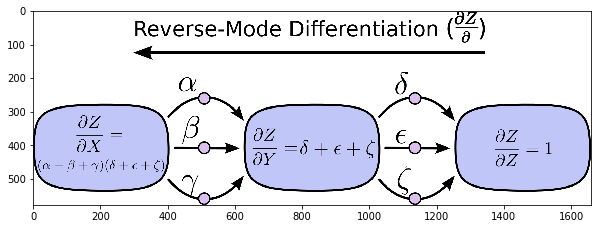

In [25]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod012.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

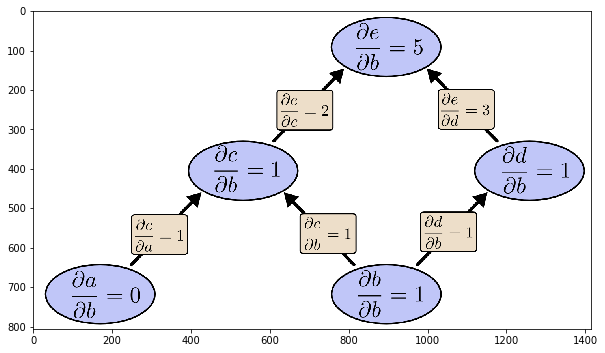

In [27]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod014.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#これはフォワードモードの微分

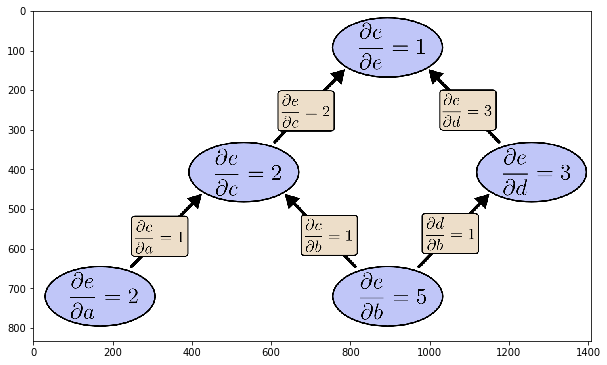

In [28]:
#これはリバースモードの微分

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod015.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

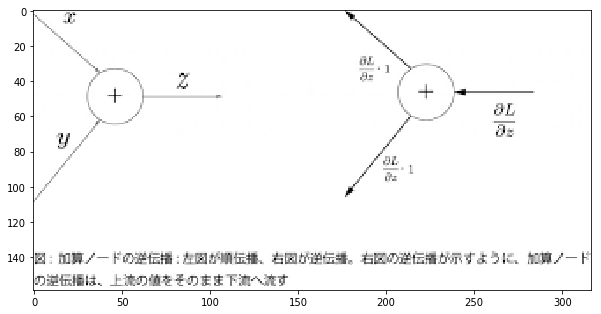

In [29]:
#計算としては思ったより単純でいいのか…。
#加算ノードの逆伝播
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod016.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()
#x=10
#y=5
#z=15
#だとしたら1.3*1だから両方1.3

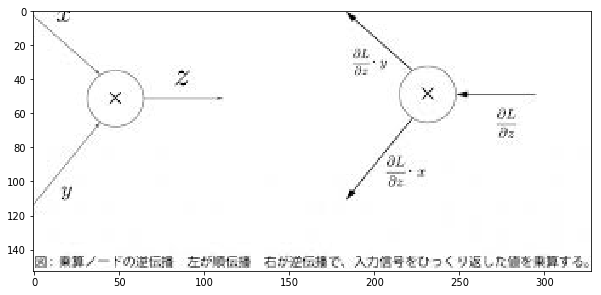

In [30]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod013.jpg')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()
#x=10
#y=5
#z=50
#だとしたらy=1.3*5=6.5 x=1.3*10=13 z=1.3*1=1.3

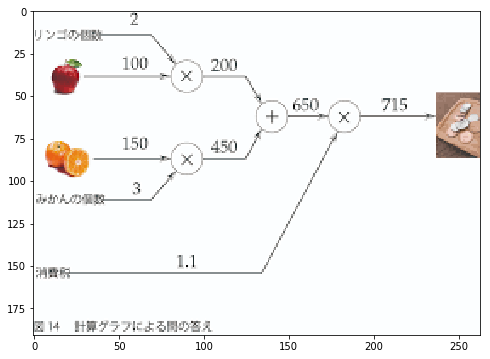

In [32]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod006.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#上記の逆伝播法の答え
#100*2+150*3*1.1=715
#715→1
#650→1.1
#200→1.1
#450→1.1
#1.1→650
#2→110
#100→2.2
#150→3.3
#3→165

In [33]:
#a=2
#b=100
#c=150
#d=3
#e=1.1
#f=200
#g=450
#h=650
#i=715

#a(2個)  →＼
#110円   ←　＼　　　 10%
#b(100円)→　　2x100=200＼
#2.2個   ←                + 200+450=650  650x1.1=  715円
#c(150円)→　　3x150＝450／      10％          |      1
#3.3個   ←　／　　　10％                     |
#d(3個)　→／                                |
#165円　 ←　　　　　　10％　　　　　　　　 |　　　　　
#e(10%)  →－－－－－－－－－－－－－－－－↑
#650円　 ←　　　　　　650円　　　　　　　　　　

#∂は添えるだけ…
#此処でやったいる事は何かって言うと恐らくだけれど、勾配の計算のスピードアップ。
#フォワードモードで計算の連鎖を重ねて順序良く行くよりも、リバースモードで因数を求めて、
#その場所同士での計算をしたほうが早いじゃんって考えから。

In [34]:
apple = 100 #b（単価)
apple_num = 2 #a（個数）
orange = 150 #c(単価)
orange_num = 3 #d(個数)
tax = 1.1 #e（消費税)

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_Layer = MulLayer()

#forward
apple_price = mul_apple_layer.forward(apple,apple_num) #(1)
orange_price = mul_orange_layer.forward(orange_price, orange_num) #(2)
all_plice = add_apple_orange_layer.forward(apple_price,orange_price) #(3)
price = mul_tax_Layer.forward(all_plice, tax) #(4)

#backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price,dorange_price = add_apple_orange_layer.backward(dapple_price) #(3)
dorange,dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple,dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

NameError: name 'orange_price' is not defined

In [35]:
apple = 100 #b（単価)
apple_num = 2 #a（個数）
orange = 150 #c(単価)
orange_num = 3 #d(個数)
tax = 1.1 #e（消費税)

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_Layer = MulLayer()

#forward
apple_price = mul_apple_layer.forward(apple,apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_plice = add_apple_orange_layer.forward(apple_price,orange_price) #(3)
price = mul_tax_Layer.forward(all_plice, tax) #(4)

#backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price,dorange_price = add_apple_orange_layer.backward(dapple_price) #(3)
dorange,dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple,dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 200


In [36]:
#a=2
#b=100
#c=150
#d=3
#e=1.1
#f=200
#g=450
#h=650
#i=715

#a(2個)  →＼
#110円   ←　＼　　　 10%
#b(100円)→　　2x100=200 #(1)＼
#2.2個   ←                + 200+450=650 #(3)  650x1.1 #(4)=  715円
#c(150円)→　　3x150＝450 #(2)／      10％          |      1
#3.3個   ←　／　　　10％                     |
#d(3個)　→／                                |
#165円　 ←　　　　　　10％　　　　　　　　 |　　　　　
#e(10%)  →－－－－－－－－－－－－－－－－↑
#650円　 ←　　　　　　650円　　　　　　　　　　

#∂は添えるだけ…
#此処でやったいる事は何かって言うと恐らくだけれど、勾配の計算のスピードアップ。
#フォワードモードで計算の連鎖を重ねて順序良く行くよりも、リバースモードで因数を求めて、
#その場所同士での計算をしたほうが早いじゃんって考えから。

In [37]:
apple = 100 #b（単価)
apple_num = 2 #a（個数）
orange = 150 #c(単価)
orange_num = 3 #d(個数)
tax = 1.1 #e（消費税)

# layer
mul_apple_layer = MulLayer() #乗算レイヤを実装
mul_orange_layer = MulLayer() #乗算レイヤを実装
add_apple_orange_layer = AddLayer() #加算レイヤを実装
mul_tax_Layer = MulLayer() #乗算レイヤを実装

#forward
apple_price = mul_apple_layer.forward(apple,apple_num) #(1)林檎×個数
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)蜜柑×個数
all_plice = add_apple_orange_layer.forward(apple_price,orange_price) #(3)総林檎値段　+　総蜜柑値段
price = mul_tax_Layer.forward(all_plice, tax) #(4)税金

#backward
dprice = 1 #総結果は1になるから、それを加える。
dall_price, dtax = mul_tax_layer.backward(dprice) #(4) 消費税の微分
dapple_price,dorange_price = add_apple_orange_layer.backward(dapple_price) #(3)　蜜柑・林檎の微分
dorange,dorange_num = mul_orange_layer.backward(dorange_price) #(2)　蜜柑の微分
dapple,dapple_num = mul_apple_layer.backward(dapple_price) #(1)　林檎の微分

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

SyntaxError: invalid character in identifier (<ipython-input-37-3309004a0f0f>, line 9)

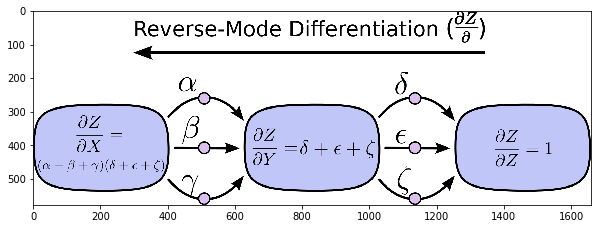

In [38]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod012.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [39]:
#5.5　活性化関数レイヤの実装
#5.5.1 ReLUレイヤー（Rectified Linear Unit)

#y = (x (x > 0)
#    (0 (x ≦ 0)

#上記からxに関するyの微分は下記の式のように求める事が可能。

#∂y/∂x = (1 (x > 0)
#          (0 (x ≦ 0)

#これは上記でやった順伝播、逆伝播からわかったこと。
#differentiationは数学でいう微分という意味

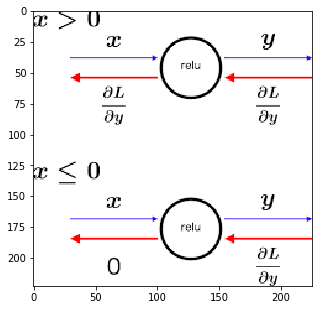

In [41]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod017.png')
plt.figure(figsize=(5, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [43]:
#上記の図はさっきの計算を行った時、xが0以下なら順伝播は逆伝播への信号を止める事が出来る。
#此処で出てきたrRelu関数。
#誤差逆伝播法にどう関連していくのかおさらいとして。
#3.7章のニューラルネットワークで出てきたものである。出てきてはいるけれど、大まかだね。
#って事でもう一回おさらい。

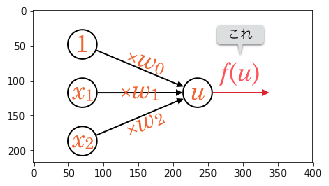

In [45]:
#今の大筋ラインはニューラルネットワークを行う時にどんな方法があるのか？という事であり、その一つ。誤差逆伝播法をやっている。
#誤差逆伝播法を何故行うかって言うと、機械学習でやることは主に２つで学習データセットと推論の向上。
#推論の向上は数を限界まで増やせばオッケーだけれど、そもそも論として学習データが雑かったら元も子もない
#その為、専門的な言葉で損失関数を出す事によって元データと今出ている結果の差を表示して、どれだけそのデータが正しく推論が正しいのかを精査する。
#そしてその数に関してもそうだけれど、増やしてもオッケーだけれどもっと単純にならないだろうか…？と昔考え出してくれたのであろう計算式。
#誤差逆伝播法である。まず順伝播で計算を行って合計を出して、そこから逆伝播を行って微分していく。
#微分することにより、順を追って計算したノード（レイヤー）の数字がわかる。
#いわゆる本当の数字って実際どないやねんっていう、本来の値段を知る事が出来、PCにとっては有り難いショートカットになる。

#横道にそれた。それでこれから使うRelu関数は活性化関数と呼ばれるものだけれど、ニューラルネットワークの推論は重みが重要となる。
#って事で此処から、おさらいスタート。

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod018.png')
plt.figure(figsize=(5, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

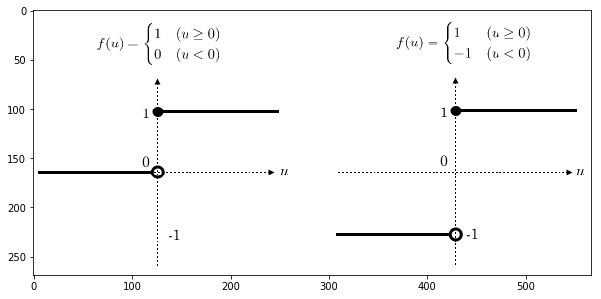

In [47]:
#活性化関数
#・多層パーセプトロンの活性化関数は微分できる事が重要
#・活性化関数とは重みの出力値を決める関数の事。（上記でこれって指している部分）

#u = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
#f(u) = ???

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod019.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

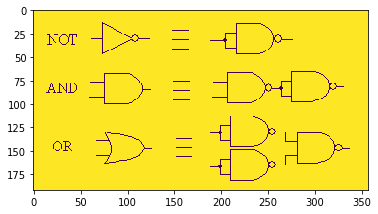

In [48]:
#単純パーセプトロンの説明では1つの重みが0より大きいか小さいかで入力を評価していた。
#スイッチのオンオフみたいなものである。

#上記の画像は黒丸が「0」を指し「１」
#この時、1と0を境目にラインを引いたとき、AND ORは可能だけれど、XORの場合はどうしても直線を通せない。

#And gateの時
# x1 x2 y
# 0  0  0
# 1  0  0
# 0  1  0
# 1  1  1

#NAnd gate→Not Andの時
# x1 x2 y
# 0  0  1
# 1  0  1
# 0  1  1
# 1  1  0

#Or gateの時
# x1 x2 y
# 0  0  0
# 1  0  1
# 0  1  1
# 1  1  1

#Xor gateの時
# x1 x2 y
# 0  0  0
# 1  0  1
# 0  1  1
# 1  1  0

#そこで出てくるのが、多層パーセプトロンである。
#パーセプトロンは層を重ねる（恐らくと思うのはあるけれど、此処では解説書に任せる）事が出来る事に有り、
#XOR Gate問題は避けて通れない命題にある。

img = imread("D:\python\deeplearning\pycontent\dataset\logicequiv.gif")
plt.imshow(img)

plt.show()

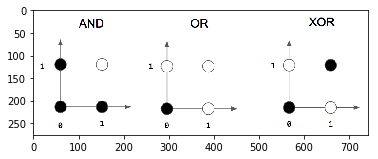

In [49]:
#つまり上記みたいな感じ。
#ただ、or not andだけだと、ニューロンは実現できなくて、そこでxorという計算式を使う事で処理を行った。それが活性化関数に繋がる。

#此処で行うのはどうやって機械にニューラルネットワークを行わせたのかって歴史みたいなものだからね。
#で、このxorへどうやって計算したらいいんだべってなって、これをつかったらいいんじゃないかってのが活性化関数のReLU関数。

img = imread("D:\python\deeplearning\pycontent\dataset\logicgates.png")
plt.imshow(img)

plt.show()

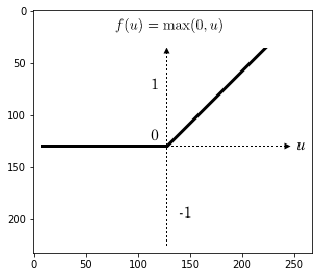

In [51]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod020.png')
plt.figure(figsize=(5, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [52]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod001.svg')
plt.figure(figsize=(5, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

OSError: cannot identify image file 'D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod001.svg'

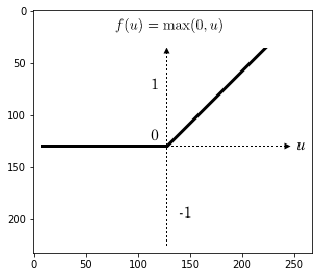

In [53]:
#やっぱsvgは無理でしたか…。此処ではそこは気にしてないのでスルーで。

#y = (x (x > 0)
#    (0 (x ≦ 0)

#上記からxに関するyの微分は下記の式のように求める事が可能。

#∂y/∂x = (1 (x > 0)
#          (0 (x ≦ 0)

#下記図は数学的には微分可能ではないんだって…。本当？まぁそこも今回の主題からはずれるのでスルー#
#

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod020.png')
plt.figure(figsize=(5, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [ ]:
#って事で、さっきまで行っていた連鎖律に戻ってくる。
#連鎖律を可視化するためにSigmoidレイヤだったり、ReLUレイヤだったりこれから登場してくる。
#要はニューラルネットワークを完成させるために色々布石を打っている。
